In [1]:
import matplotlib.pyplot as plt
import pandas as pd

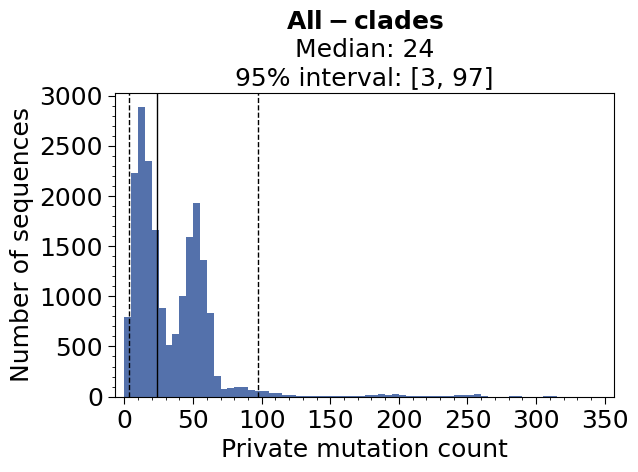

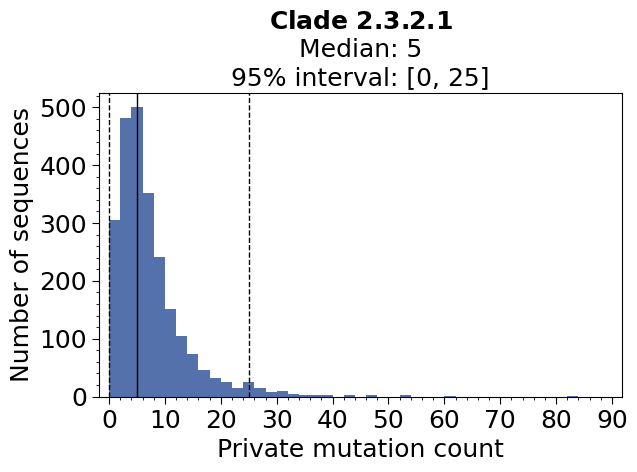

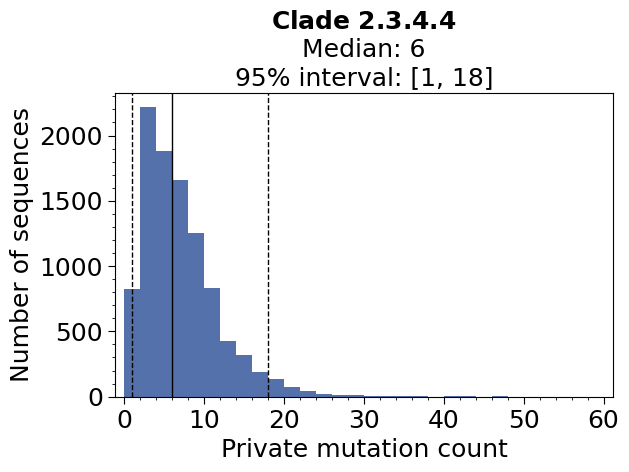

In [2]:
datasets = ['h5nx', '2321', '2344']

for dataset in datasets:
    clade = {'h5nx':'All-clades','2321':'Clade 2.3.2.1','2344':'Clade 2.3.4.4'}[dataset]
    
    data = f'/Users/jort/coding/h5-clades/20240712-LABEL-benchmarking/{dataset}/output/nextclade_analysis.tsv'
    df = pd.read_csv(data, sep='\t', low_memory=False)
    df.rename(columns={'qc.privateMutations.total':'qcprivateMutationstotal'}, inplace=True)
    
    priv_mut_counts = df['qcprivateMutationstotal']
    
    maxc = max(priv_mut_counts)
    meanc = round(sum(priv_mut_counts)/len(priv_mut_counts),2)
    
    q025,q50,q975 = list(round(x) for x in df['privateNucMutations.totalPrivateSubstitutions'].quantile([0.025,0.5,0.975]))

    [xlim, step, tickstep, mintickstep] = {'h5nx':[350,5,50,10],
                    '2321':[90,2,10,2],
                    '2344':[60,2,10,2]}[dataset]
        
    fig = df.hist(column='qcprivateMutationstotal', bins=range(0,xlim,step), color='#5471AB', xlabelsize=18, ylabelsize=18)
    fig[0][0].set_title(r"$\bf{{{clade}}}$".format(clade=clade.replace(' ','\\ '))+f'\nMedian: {q50}\n95% interval: [{q025}, {q975}]', size=18)
    plt.axvline(q50, color='k', linestyle='solid', linewidth=1)
    plt.axvline(q025, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(q975, color='k', linestyle='dashed', linewidth=1)
    fig[0,0].set_xlabel('Private mutation count', size=18)
    fig[0,0].set_ylabel('Number of sequences', size=18)
    plt.tight_layout()
    plt.grid(False)
    plt.xlim(left=-xlim/50, right=xlim*51/50)
    plt.xticks(range(0,xlim+1,tickstep))
    plt.minorticks_on()
    fig[0,0].tick_params(which='major', length=5)
    plt.savefig(f'{dataset}_privmuts.png', format='png', dpi=600)
    